<h1 style="color:green"> Bank Customer Churn Prediction Using Machine Learning

In [64]:
import pandas as pd

In [65]:
data=pd.read_csv('/Users/pallab1200/Downloads/Churn_Modelling.csv')

In [66]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [68]:
data.shape

(10000, 14)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [70]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [71]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [72]:
data.duplicated().sum()

0

In [73]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [74]:
# so data is imbalanced. So we have to balanced the data set.

<h1 style='color:red'> Data PreProcessing

In [77]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
data=data.drop(columns=['Surname','CustomerId','RowNumber'])
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [81]:
data=pd.get_dummies(data,columns=['Gender'])

In [82]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [83]:
data.Geography.nunique()

3

In [84]:
data=pd.get_dummies(data,columns=['Geography'])

In [85]:
data.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.0,1,1,1,101348.88,1,1,0,1,0,0


In [61]:
# So Categorical Data Encoding is completed.

<h5> Data Scaling:

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [89]:
data['CreditScore']=sc.fit_transform(pd.DataFrame(data['CreditScore']))
data['Age']=sc.fit_transform(pd.DataFrame(data['Age']))
data['Tenure']=sc.fit_transform(pd.DataFrame(data['Tenure']))
data['Balance']=sc.fit_transform(pd.DataFrame(data['Balance']))
data['EstimatedSalary']=sc.fit_transform(pd.DataFrame(data['EstimatedSalary']))

In [90]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,1,0,1,0,0
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,1,0,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,1,1,0,1,0,0
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,1,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,1,0,0,0,1


<h1 style='color:red'> Feature selection

In [94]:
X=data.drop(columns='Exited')
Y=data['Exited']

In [95]:
from sklearn.ensemble import ExtraTreesClassifier

In [96]:
etc=ExtraTreesClassifier()

In [97]:
etc.fit(X,Y)

ExtraTreesClassifier()

In [98]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Female', 'Gender_Male',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [99]:
cols=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Female', 'Gender_Male',
       'Geography_France', 'Geography_Germany', 'Geography_Spain']

In [100]:
imp_parameters=pd.Series(etc.feature_importances_,index=cols)

In [101]:
imp_parameters

CreditScore          0.138076
Age                  0.232907
Tenure               0.106197
Balance              0.135355
NumOfProducts        0.143918
HasCrCard            0.021728
IsActiveMember       0.035462
EstimatedSalary      0.137503
Gender_Female        0.006384
Gender_Male          0.006737
Geography_France     0.008013
Geography_Germany    0.021184
Geography_Spain      0.006535
dtype: float64

In [117]:
imp_parameters.nlargest(8)

Age                0.232907
NumOfProducts      0.143918
CreditScore        0.138076
EstimatedSalary    0.137503
Balance            0.135355
Tenure             0.106197
IsActiveMember     0.035462
HasCrCard          0.021728
dtype: float64

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

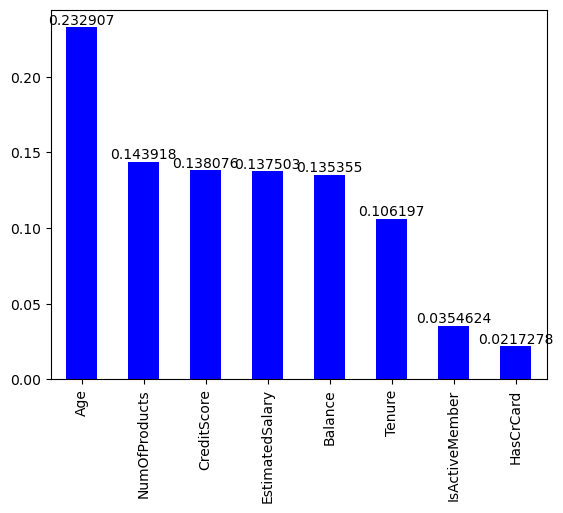

In [119]:
see=imp_parameters.nlargest(8).plot(kind="bar",color="blue")
for i in see.containers:
    see.bar_label(i)

    

In [120]:
#So These are the top 8 features that has immense effect in the churn analysis of the dataset . So apart from this above dataset please drop all other existing features from the datset.

In [125]:
imp_parameters.nlargest(8).index

Index(['Age', 'NumOfProducts', 'CreditScore', 'EstimatedSalary', 'Balance',
       'Tenure', 'IsActiveMember', 'HasCrCard'],
      dtype='object')

In [126]:
most_imp=['Age', 'NumOfProducts', 'CreditScore', 'EstimatedSalary', 'Balance',
       'Tenure', 'IsActiveMember', 'HasCrCard']

In [128]:
W=X[most_imp]

In [130]:
W.head()

,Age,NumOfProducts,CreditScore,EstimatedSalary,Balance,Tenure,IsActiveMember,HasCrCard
0,0.293517,1,-0.326221,0.021886,-1.225848,-1.041760,1,1
1,0.198164,1,-0.440036,0.216534,0.117350,-1.387538,1,0
2,0.293517,3,-1.536794,0.240687,1.333053,1.032908,0,1
3,0.007457,2,0.501521,-0.108918,-1.225848,-1.387538,0,0
4,0.388871,1,2.063884,-0.365276,0.785728,-1.041760,1,1


<h1 style='color:red'> Model Selection & Train Test Split

In [134]:
from sklearn.model_selection import train_test_split

In [137]:
X_train,X_test,Y_train,Y_test=train_test_split(W,Y,test_size=0.2,random_state=42,stratify=Y)

In [138]:
len(X_train)

8000

In [139]:
len(X_test)

2000

<h1 style='color:blue'> Handling Not Imbalanced

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [141]:
mdl1=RandomForestClassifier()
mdl2=GradientBoostingClassifier()

In [142]:
mdl1.fit(X_train,Y_train)
mdl2.fit(X_train,Y_train)

GradientBoostingClassifier()

In [144]:
print(mdl1.score(X_test,Y_test))
mdl2.score(X_test,Y_test)

0.854


0.8605

In [145]:
# So as we see that the data is not balanced so this score is comes low. Now calculate all other metrics.

In [147]:
y_predicted=mdl1.predict(X_test)

In [153]:
y_predicted2=mdl2.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [159]:
print("For RandomForest:")
print(accuracy_score(y_predicted,Y_test))
print(recall_score(y_predicted,Y_test))
print(f1_score(y_predicted,Y_test))
print(precision_score(y_predicted,Y_test))

For RandomForest:
0.854
0.7489177489177489
0.542319749216301
0.4250614250614251


In [160]:
print("For GradientBoost:")
print(accuracy_score(y_predicted2,Y_test))
print(recall_score(y_predicted2,Y_test))
print(f1_score(y_predicted2,Y_test))
print(precision_score(y_predicted2,Y_test))

For GradientBoost:
0.8605
0.7711864406779662
0.5660964230171074
0.44717444717444715


In [155]:
# So the scores comes out horrible that indicates model is not at all make predictions. So fix them using Resampling.

<h1 style='color:blue'> Handling Imbalanced ~ Resampling

<h4 style='color:red'> Oversamling using SMOTE

In [163]:
from imblearn.over_sampling import SMOTE

In [164]:
Y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [165]:
U,T=SMOTE().fit_resample(W,Y)

In [166]:
T.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [167]:
U.shape

(15926, 8)

In [168]:
T.shape

(15926,)

In [169]:
U_train,U_test,T_train,T_test=train_test_split(U,T,test_size=0.2,random_state=42)

In [170]:
len(U_train)

12740

In [171]:
len(U_test)

3186

<h4 style='color:red'> Model Implementation

In [176]:
mdlE=RandomForestClassifier()
mdlF=GradientBoostingClassifier()

In [177]:
mdlE.fit(U_train,T_train)
mdlF.fit(U_train,T_train)

GradientBoostingClassifier()

In [178]:
print(mdlE.score(U_test,T_test))
mdlF.score(U_test,T_test)

0.8920276208411801


0.857187696170747

In [179]:
new_y_predicted=mdlE.predict(U_test)
new_y_predicted2=mdlF.predict(U_test)

In [180]:
print("For RandomForest:")
print(accuracy_score(new_y_predicted,T_test))
print(recall_score(new_y_predicted,T_test))
print(f1_score(new_y_predicted,T_test))
print(precision_score(new_y_predicted,T_test))

For RandomForest:
0.8920276208411801
0.8847867600254615
0.8898847631241997
0.8950418544752092


In [181]:
print("For GradientBoost:")
print(accuracy_score(new_y_predicted2,T_test))
print(recall_score(new_y_predicted2,T_test))
print(f1_score(new_y_predicted2,T_test))
print(precision_score(new_y_predicted2,T_test))

For GradientBoost:
0.857187696170747
0.8597640891218873
0.8522247482949009
0.8448164842240824


In [182]:
model=['RandomForestClassifier', 'GradientBoostClassifier']
SCORES=['accuracy_score','recall_score','f1_score','precision_score']

In [186]:
soc1=[0.8920276208411801,
0.8847867600254615,
0.8898847631241997,
0.8950418544752092]

    

In [194]:
soc2=[0.857187696170747,
0.8597640891218873,
0.8522247482949009,
0.8448164842240824]

In [200]:
da=pd.DataFrame(soc1,columns=[model[0]])

In [203]:
da['SCORES']=SCORES
da

,RandomForestClassifier,SCORES
0,0.892028,accuracy_score
1,0.884787,recall_score
2,0.889885,f1_score
3,0.895042,precision_score


In [204]:
dq=pd.DataFrame(soc2,columns=[model[1]])
dq['SCORES']=SCORES
dq


,GradientBoostClassifier,SCORES
0,0.857188,accuracy_score
1,0.859764,recall_score
2,0.852225,f1_score
3,0.844816,precision_score


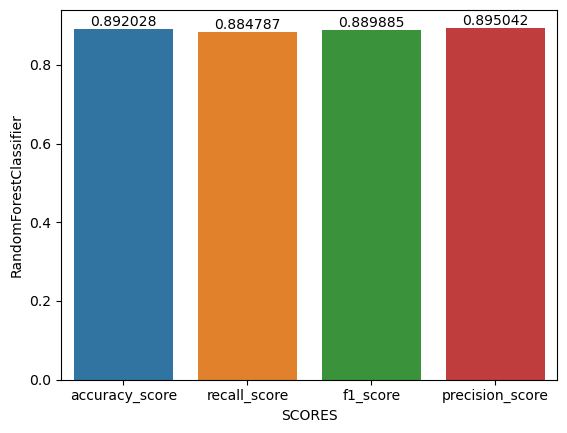

In [206]:
see=sns.barplot(da,x=da.SCORES,y=da.RandomForestClassifier)
for i in see.containers:
    see.bar_label(i)

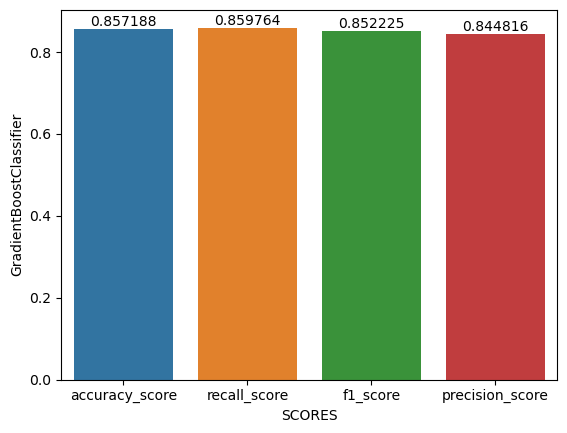

In [207]:
see=sns.barplot(dq,x=dq.SCORES,y=dq.GradientBoostClassifier)
for i in see.containers:
    see.bar_label(i)

In [213]:
val1=da.RandomForestClassifier[0]
val2=dq.GradientBoostClassifier[0]
val_list=[val1,val2]

In [217]:
datawire=pd.DataFrame(val_list,columns=['Accuracy_Value'])
datawire['Model_Name']=['RandomForestClassifier','GradientBoostClassifier']
datawire

,Accuracy_Value,Model_Name
0,0.892028,RandomForestClassifier
1,0.857188,GradientBoostClassifier


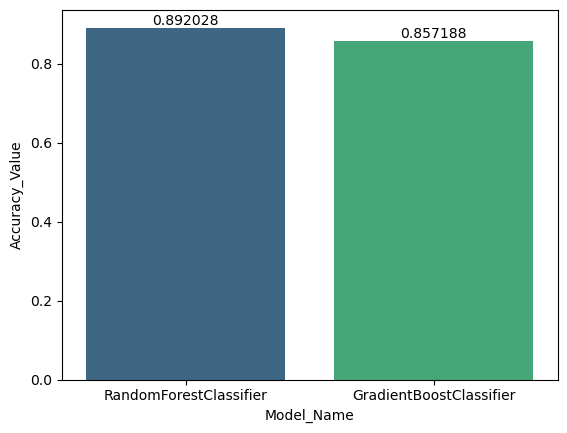

In [220]:
see=sns.barplot(x=datawire.Model_Name,y=datawire.Accuracy_Value,palette='viridis')
for i in see.containers:
    see.bar_label(i)

#### So Random Forest Classifier is Best Model For This.

<h2 style="color:purple"> Testing

In [223]:
U_test.sample(5)

,Age,NumOfProducts,CreditScore,EstimatedSalary,Balance,Tenure,IsActiveMember,HasCrCard
7524,0.102810,1,0.097996,1.479225,1.453581,1.032908,1,1
10580,1.054865,1,1.578035,-1.346409,0.347733,1.033982,0,0
10050,1.023706,1,0.150970,0.700096,0.500232,0.687130,1,1
1119,-0.946079,2,1.091287,-1.655456,0.655930,-1.041760,0,1
3379,0.579578,2,1.577585,0.491897,-1.225848,0.687130,1,1


In [222]:
U_test.columns

Index(['Age', 'NumOfProducts', 'CreditScore', 'EstimatedSalary', 'Balance',
       'Tenure', 'IsActiveMember', 'HasCrCard'],
      dtype='object')

In [225]:
mdlE.predict([[22,2,642,10000,0,0,1,0]])

/Users/pallab1200/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
mdlE.predict([[42